In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [58]:
data=pd.read_csv("music-mental.csv")

In [148]:
#data.info #data.head() #data.shape 3data.dtypes
data.describe(exclude='number').T
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,736.0,2.520680e+01,1.204677e+01,10.0,18.0,21.0,28.0,89.0
Hours per day,736.0,3.572758e+00,3.028199e+00,0.0,2.0,3.0,5.0,24.0
BPM,629.0,1.589948e+06,3.987261e+07,0.0,100.0,120.0,144.0,999999999.0
Anxiety,736.0,5.837636e+00,2.793054e+00,0.0,4.0,6.0,8.0,10.0
Depression,736.0,4.796196e+00,3.028870e+00,0.0,2.0,5.0,7.0,10.0
Insomnia,736.0,3.738451e+00,3.088689e+00,0.0,1.0,3.0,6.0,10.0
OCD,736.0,2.637228e+00,2.842017e+00,0.0,0.0,2.0,5.0,10.0


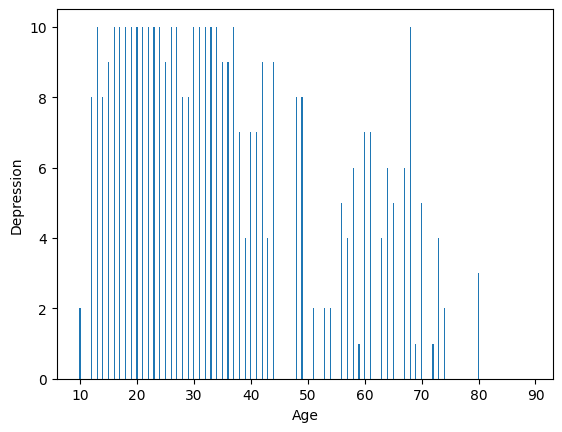

In [60]:
x_axis=data.Age
y_axis=data.Depression
plt.bar(x_axis,y_axis, width = 0.2)
plt.xlabel("Age")
plt.ylabel("Depression")
plt.show()

In [61]:
data = data.drop_duplicates()
data['Age'].fillna(data['Age'].mean(), inplace=True)
data.drop(['Timestamp', 'Permissions' , 'Foreign languages'], axis=1, inplace=True)

In [62]:
cleaned_data = data[(data['Age'] >= 15) & (data['Age'] <= 70) & (data['Hours per day'] >= 1) & (data['Hours per day'] < 10) ]

In [63]:
cleaned_data.shape

(637, 30)

<ipython-input-91-edec0b5bb7b9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = cleaned_data.corr()['Age']
<ipython-input-91-edec0b5bb7b9>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cleaned_data.corr())


<Axes: >

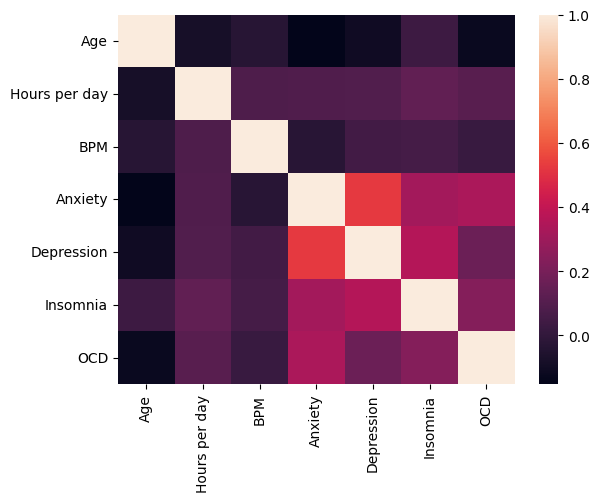

In [91]:
correlation = cleaned_data.corr()['Age']
correlation.sort_values()
sns.heatmap(cleaned_data.corr())

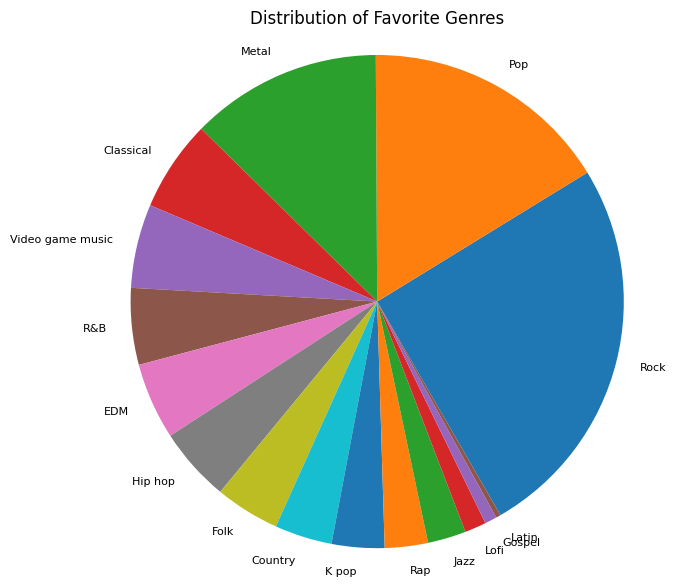

In [90]:
genre_counts = cleaned_data['Fav genre'].value_counts()

plt.figure(figsize=(7, 7))
pie_chart = plt.pie(genre_counts, labels=genre_counts.index, startangle=300)

for label in pie_chart[1]:
    label.set_fontsize(8)

plt.title('Distribution of Favorite Genres')
plt.axis('equal')

plt.show()

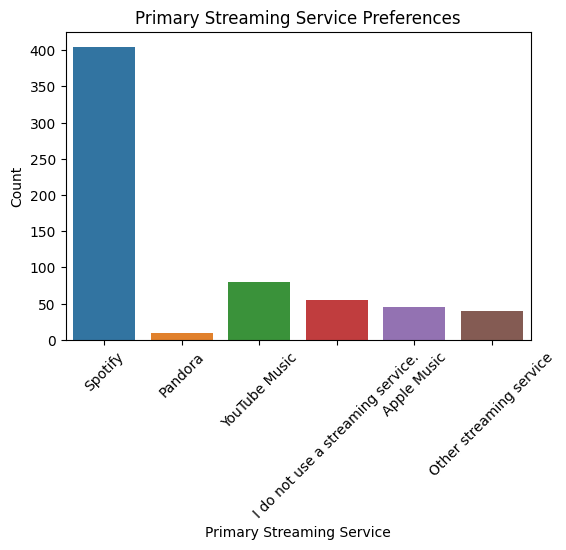

In [111]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Primary streaming service', data=cleaned_data)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Primary Streaming Service Preferences')
plt.xlabel('Primary Streaming Service')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='While working', ylabel='count'>

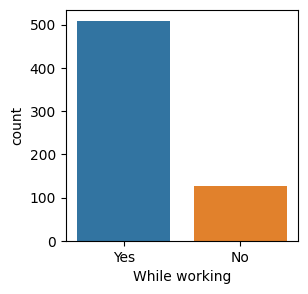

In [114]:
plt.figure(figsize=(3,3))
sns.countplot(x=cleaned_data['While working'])

<ipython-input-115-a787c844792d>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=cleaned_data['Fav genre'], y=cleaned_data['Age'], ci=None)


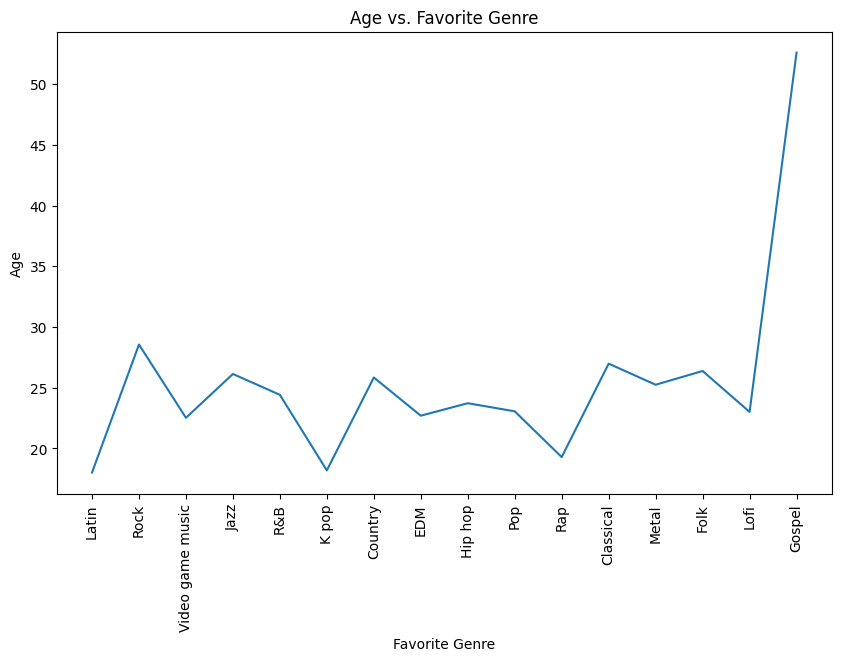

In [115]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=cleaned_data['Fav genre'], y=cleaned_data['Age'], ci=None)
plt.xticks(rotation=90)

plt.title('Age vs. Favorite Genre')
plt.xlabel('Favorite Genre')
plt.ylabel('Age')
plt.show()


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Latin'),
  Text(1, 0, 'Rock'),
  Text(2, 0, 'Video game music'),
  Text(3, 0, 'Jazz'),
  Text(4, 0, 'R&B'),
  Text(5, 0, 'K pop'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'EDM'),
  Text(8, 0, 'Hip hop'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Rap'),
  Text(11, 0, 'Classical'),
  Text(12, 0, 'Metal'),
  Text(13, 0, 'Folk'),
  Text(14, 0, 'Lofi'),
  Text(15, 0, 'Gospel')])

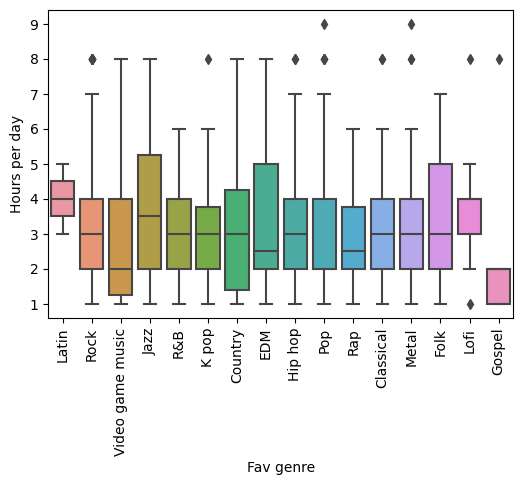

In [105]:
plt.figure(figsize=(6,4))
sns.boxplot(x=cleaned_data['Fav genre'], y=cleaned_data['Hours per day'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Latin'),
  Text(1, 0, 'Rock'),
  Text(2, 0, 'Video game music'),
  Text(3, 0, 'Jazz'),
  Text(4, 0, 'R&B'),
  Text(5, 0, 'K pop'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'EDM'),
  Text(8, 0, 'Hip hop'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Rap'),
  Text(11, 0, 'Classical'),
  Text(12, 0, 'Metal'),
  Text(13, 0, 'Folk'),
  Text(14, 0, 'Lofi'),
  Text(15, 0, 'Gospel')])

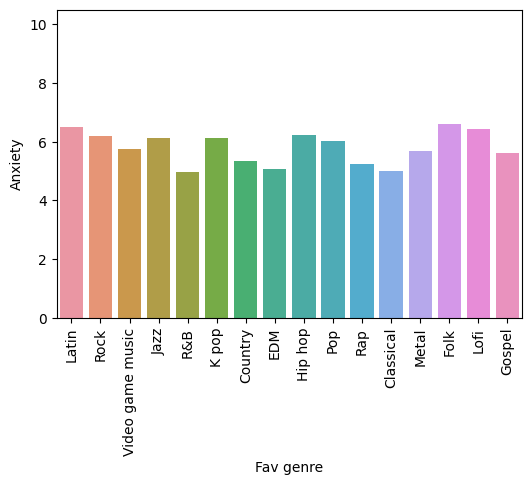

In [109]:
plt.figure(figsize=(6,4))
sns.barplot(x=cleaned_data['Fav genre'], y=cleaned_data['Anxiety'], errwidth=0)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Latin'),
  Text(1, 0, 'Rock'),
  Text(2, 0, 'Video game music'),
  Text(3, 0, 'Jazz'),
  Text(4, 0, 'R&B'),
  Text(5, 0, 'K pop'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'EDM'),
  Text(8, 0, 'Hip hop'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Rap'),
  Text(11, 0, 'Classical'),
  Text(12, 0, 'Metal'),
  Text(13, 0, 'Folk'),
  Text(14, 0, 'Lofi'),
  Text(15, 0, 'Gospel')])

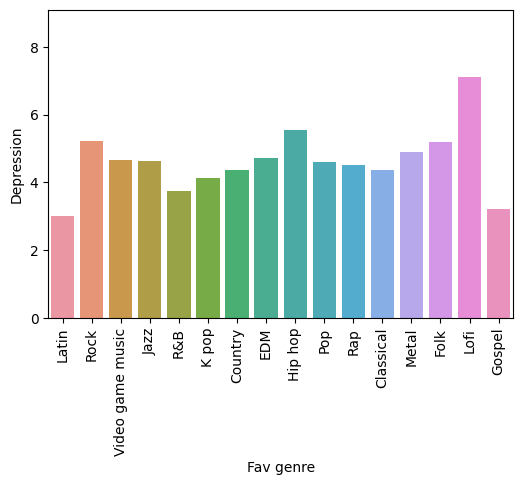

In [110]:
plt.figure(figsize=(6,4))
sns.barplot(x=cleaned_data['Fav genre'], y=cleaned_data['Depression'], errwidth=0)
plt.xticks(rotation=90)

<ipython-input-119-d459f1e2deb3>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=cleaned_data['Fav genre'], y=cleaned_data['OCD'], palette=custom_palette, ci=None)


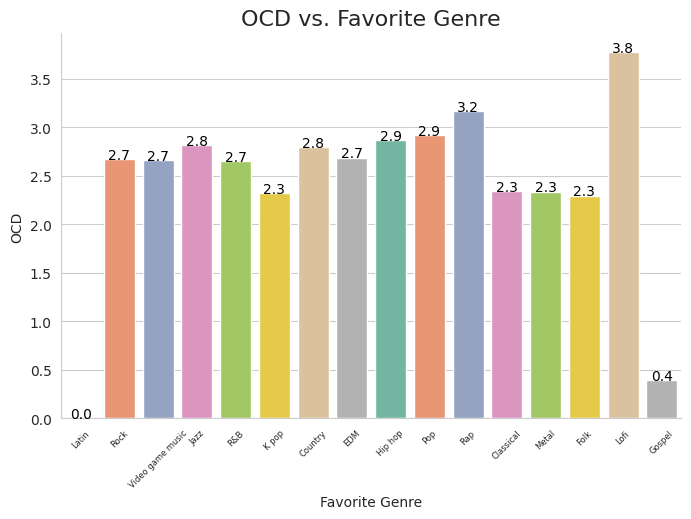

In [119]:
custom_palette = sns.color_palette("Set2", len(cleaned_data['Fav genre'].unique()))
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")
ax = sns.barplot(x=cleaned_data['Fav genre'], y=cleaned_data['OCD'], palette=custom_palette, ci=None)
plt.xticks(rotation=90)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='baseline', fontsize=10, color='black')

plt.title('OCD vs. Favorite Genre', fontsize=16)
plt.xlabel('Favorite Genre', fontsize=10)
plt.ylabel('OCD', fontsize=10)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=6)
sns.despine()
plt.show()


<ipython-input-120-293594026f63>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=cleaned_data['Fav genre'], y=cleaned_data['Insomnia'], palette=custom_palette, ci=None)


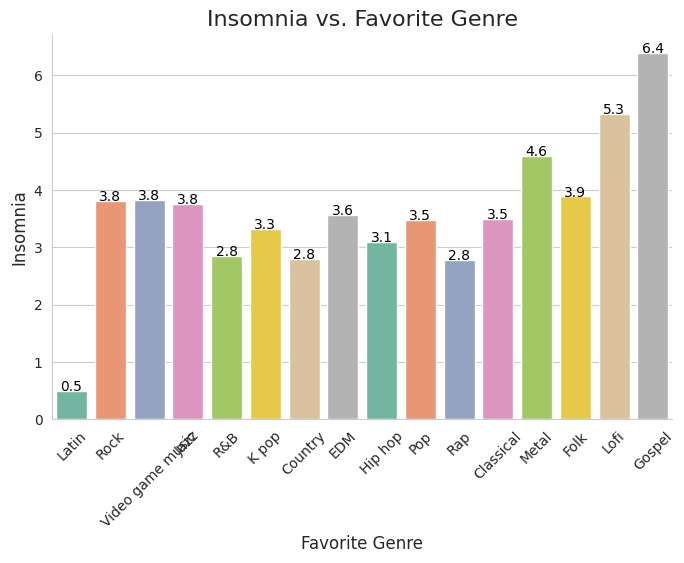

In [120]:
custom_palette = sns.color_palette("Set2", len(cleaned_data['Fav genre'].unique()))
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")
ax = sns.barplot(x=cleaned_data['Fav genre'], y=cleaned_data['Insomnia'], palette=custom_palette, ci=None)
plt.xticks(rotation=90)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='baseline', fontsize=10, color='black')

plt.title('Insomnia vs. Favorite Genre', fontsize=16)
plt.xlabel('Favorite Genre', fontsize=12)
plt.ylabel('Insomnia', fontsize=12)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=10)
sns.despine()
plt.show()


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Latin'),
  Text(1, 0, 'Rock'),
  Text(2, 0, 'Video game music'),
  Text(3, 0, 'Jazz'),
  Text(4, 0, 'R&B'),
  Text(5, 0, 'K pop'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'EDM'),
  Text(8, 0, 'Hip hop'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Rap'),
  Text(11, 0, 'Classical'),
  Text(12, 0, 'Metal'),
  Text(13, 0, 'Folk'),
  Text(14, 0, 'Lofi'),
  Text(15, 0, 'Gospel')])

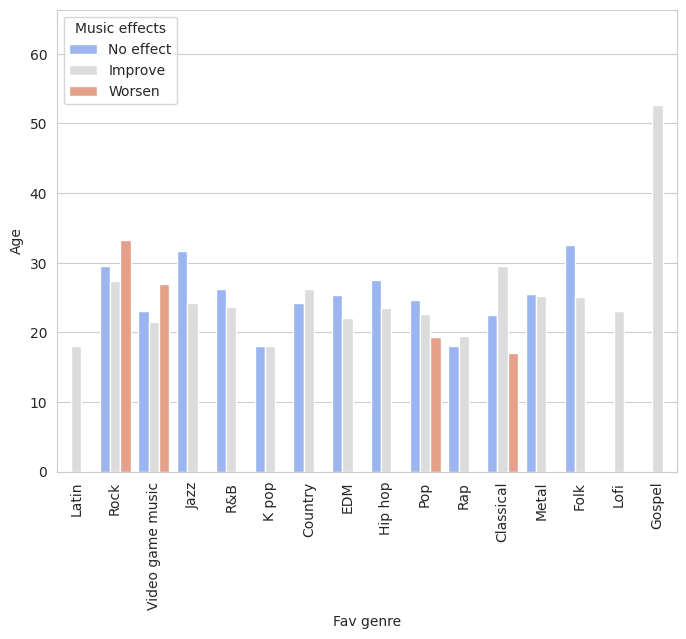

In [122]:
plt.figure(figsize=(8,6))
sns.barplot(x=cleaned_data['Fav genre'], y=cleaned_data['Age'], hue=cleaned_data['Music effects'], errwidth=0, palette='coolwarm')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Latin'),
  Text(1, 0, 'Rock'),
  Text(2, 0, 'Video game music'),
  Text(3, 0, 'Jazz'),
  Text(4, 0, 'R&B'),
  Text(5, 0, 'K pop'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'EDM'),
  Text(8, 0, 'Hip hop'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Rap'),
  Text(11, 0, 'Classical'),
  Text(12, 0, 'Metal'),
  Text(13, 0, 'Folk'),
  Text(14, 0, 'Lofi'),
  Text(15, 0, 'Gospel')])

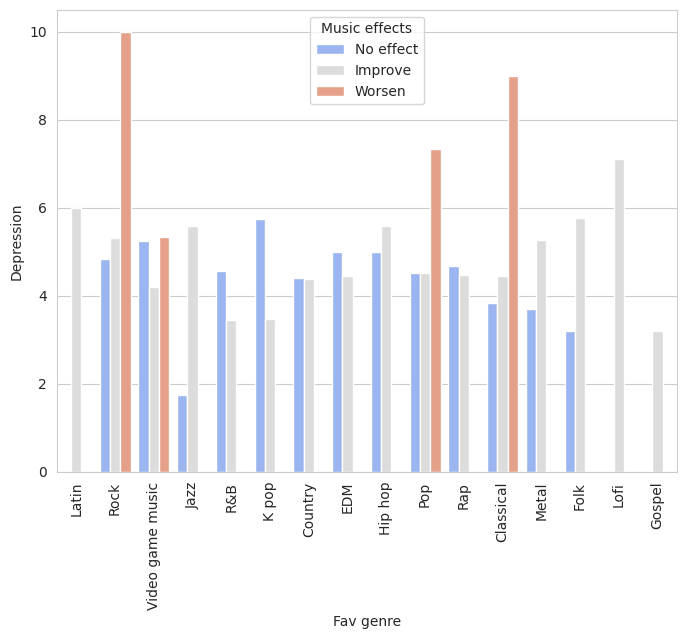

In [123]:
plt.figure(figsize=(8,6))
sns.barplot(x=cleaned_data['Fav genre'], y=cleaned_data['Depression'], hue=cleaned_data['Music effects'], errwidth=0, palette='coolwarm')
plt.xticks(rotation=90)

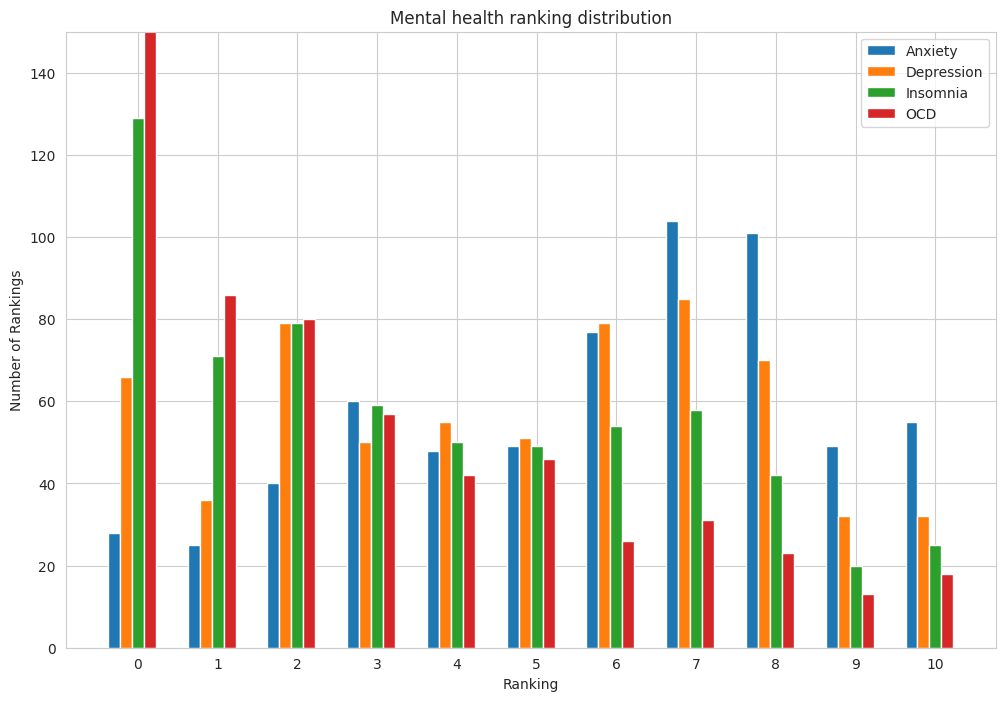

In [134]:
mlabels = ["Anxiety", "Depression", "Insomnia", "OCD"]

mental_data = cleaned_data[mlabels]
mental_data.round(0).astype(int)

disorder_count = []
for disorder in mlabels:
    x=0
    while x !=11:
        count =  (mental_data[disorder].values == x).sum()
        disorder_count.append(count)
        x +=1

labels = ['0','1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
x = np.arange(len(labels))
width = 0.15

fig, ax = plt.subplots(figsize=(12, 8))

b1 = ax.bar(x-2*width, disorder_count[0:11], width, label="Anxiety")
b2 = ax.bar(x-width, disorder_count[11:22], width, label="Depression")
b3 = ax.bar(x, disorder_count[22:33], width, label="Insomnia")
b4 = ax.bar(x+width, disorder_count[33:], width, label="OCD")

ax.set_ylim([0, 150])
ax.set_ylabel('Number of Rankings')
ax.set_xlabel('Ranking')
ax.set_title('Mental health ranking distribution')
ax.set_xticks(x, labels)
ax.legend()
plt.show()

In [135]:
max(disorder_count)

213

In [137]:
for disorder in mlabels:
    disorder_avg = str(round(cleaned_data[disorder].mean(), 2))
    print(disorder + ' average: ' + disorder_avg)

Anxiety average: 5.84
Depression average: 4.81
Insomnia average: 3.69
OCD average: 2.64


<Axes: title={'center': 'Effects of Music on Mental Health'}, ylabel='Music effects'>

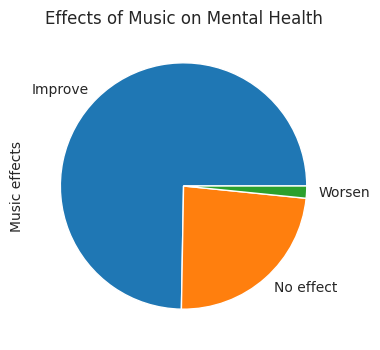

In [138]:
plt.figure(figsize=(5,4))
plt.title('Effects of Music on Mental Health')

effects = cleaned_data['Music effects'].value_counts()
effects.plot(kind='pie')

In [140]:
#print(cleaned_data['BPM'].max())
#print(cleaned_data['BPM'].min())
cleaned_data = cleaned_data[(cleaned_data.BPM < 500) & (cleaned_data.BPM > 20)]
print(cleaned_data['BPM'].max())
print(cleaned_data['BPM'].min())

220.0
52.0


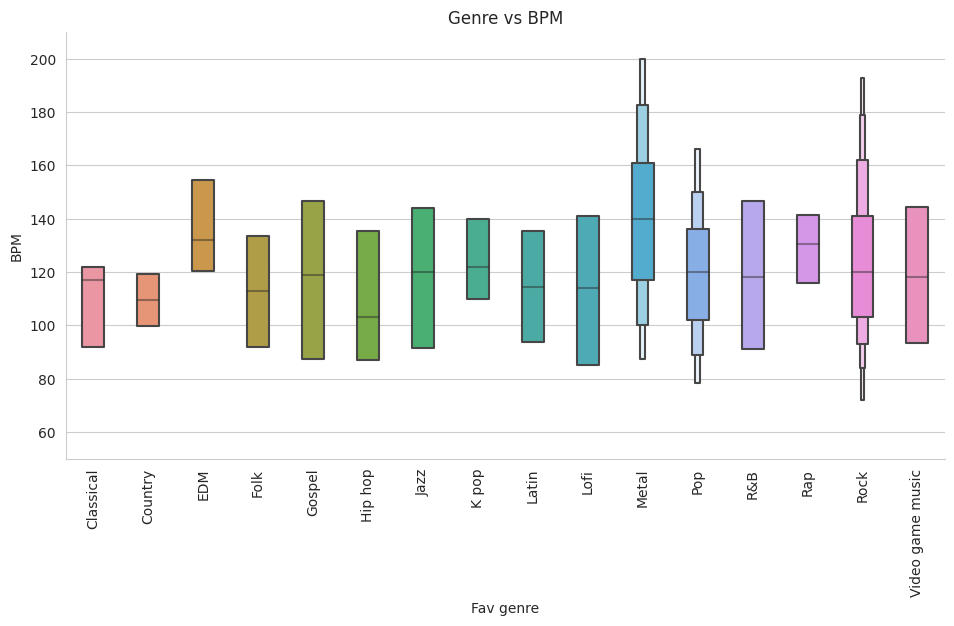

In [142]:
sns.catplot(data=cleaned_data.sort_values("Fav genre"), x="Fav genre", y="BPM", kind="boxen", height=5, aspect=2,width = 0.4, showfliers=False)

plt.xticks(rotation = 90)
plt.title('Genre vs BPM')
plt.ylim(50, 210)
plt.show()

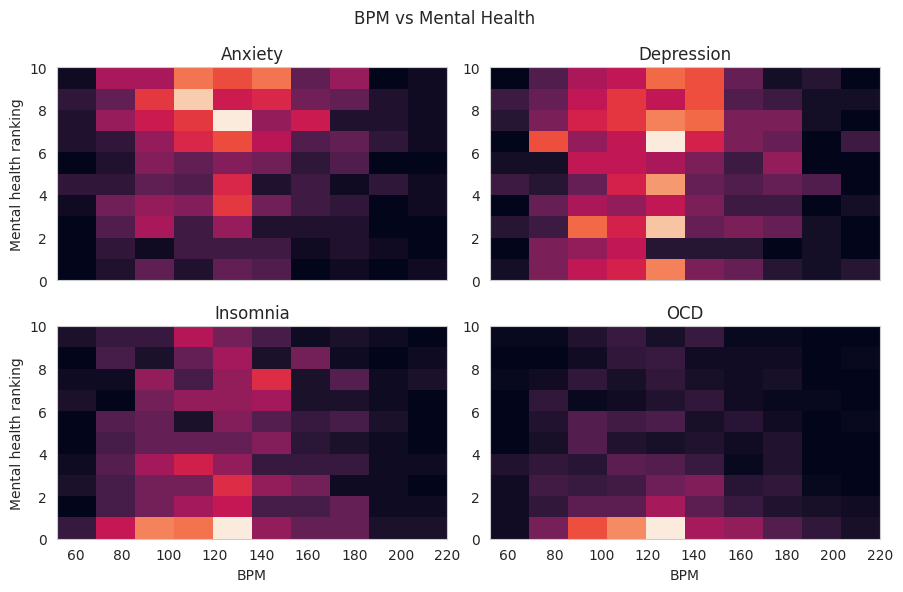

In [144]:
plt.figure(figsize=(9, 6))
plt.suptitle("BPM vs Mental Health")

y = cleaned_data["Anxiety"]
y2 = cleaned_data["Depression"]
y3 = cleaned_data["Insomnia"]
y4 = cleaned_data["OCD"]
x = cleaned_data["BPM"]

ax = plt.subplot(221)
plt.title('Anxiety')
plt.xticks([])
plt.ylabel('Mental health ranking')
plt.hist2d(x, y, density=True)

ax = plt.subplot(222)
plt.title('Depression')
plt.xticks([])
plt.hist2d(x, y2, density=True)

ax = plt.subplot(223)
plt.title('Insomnia')
plt.ylabel('Mental health ranking')
plt.xlabel('BPM')
plt.hist2d(x, y3, density=True)

ax = plt.subplot(224)
plt.title('OCD')
plt.xlabel('BPM')
plt.hist2d(x, y4, density=True)

plt.tight_layout()
plt.show()
